In [3]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [16]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

x_train = x_train.astype("float32")/ 255.0 
x_test = x_test.astype("float32")/ 255.0

shape = x_train.shape

shape

(50000, 32, 32, 3)

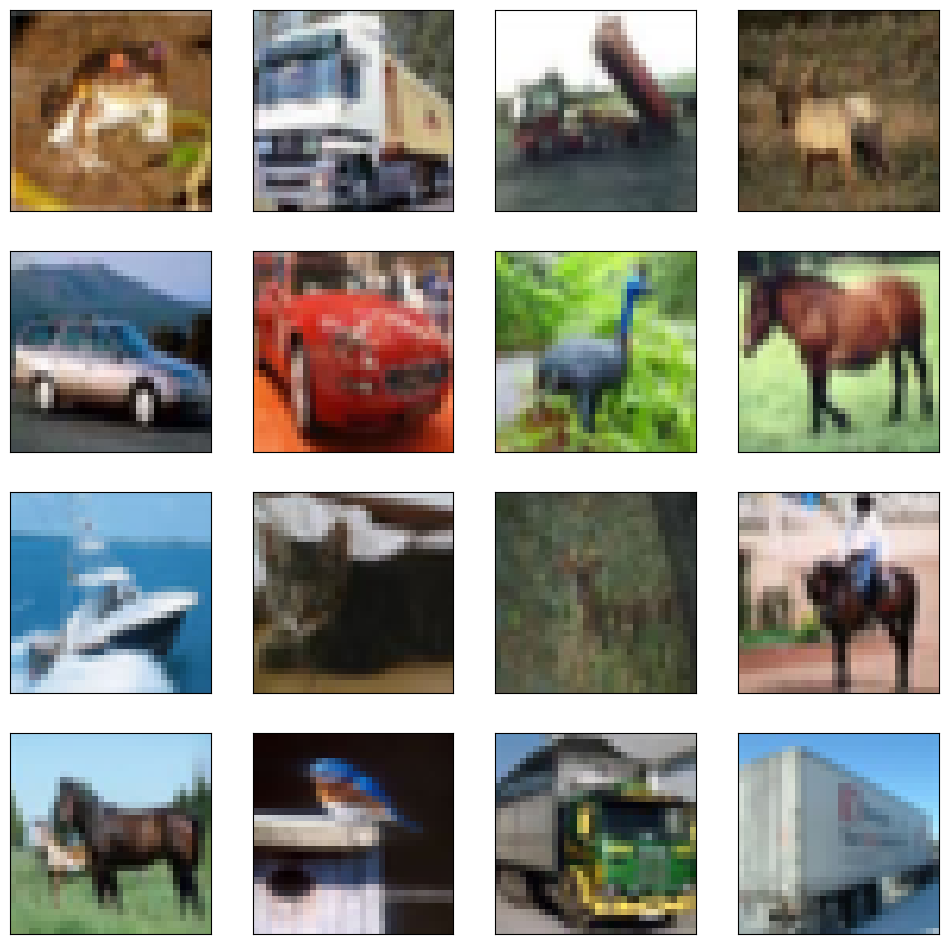

In [14]:
'''
  display few images
'''

def display_images(images,labels,n_samples,n_rows):
    
    plt.figure(figsize=(12,12))
    for i in range(n_samples):
        
        plt.subplot(n_rows,n_rows,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        #plt.xlabel(list(set(labels))[labels[i][0]])
        
    plt.show()
    
display_images(x_train,y_train,16,4)



In [21]:
'''
  model architecture
'''

model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=shape[1:4]))
model.add(layers.Conv2D(32,3,padding='valid',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [25]:
'''
 compiling the models
 ''' 
 
model.compile(
     
     loss= keras.losses.SparseCategoricalCrossentropy(),
     optimizer = keras.optimizers.Adam(learning_rate=3e-4),
     metrics = ["accuracy"]
)

training_record = model.fit(x_train,y_train,epochs=20,batch_size=16,verbose=2)

training_record

Epoch 1/20
3125/3125 - 82s - loss: 0.6022 - accuracy: 0.7930
Epoch 2/20
3125/3125 - 76s - loss: 0.5643 - accuracy: 0.8062
Epoch 3/20
3125/3125 - 69s - loss: 0.5290 - accuracy: 0.8184
Epoch 4/20
3125/3125 - 69s - loss: 0.4971 - accuracy: 0.8297
Epoch 5/20
3125/3125 - 69s - loss: 0.4649 - accuracy: 0.8399
Epoch 6/20
3125/3125 - 70s - loss: 0.4340 - accuracy: 0.8504
Epoch 7/20
3125/3125 - 68s - loss: 0.4057 - accuracy: 0.8601
Epoch 8/20
3125/3125 - 68s - loss: 0.3745 - accuracy: 0.8715
Epoch 9/20
3125/3125 - 69s - loss: 0.3473 - accuracy: 0.8812
Epoch 10/20
3125/3125 - 67s - loss: 0.3217 - accuracy: 0.8907
Epoch 11/20
3125/3125 - 68s - loss: 0.2985 - accuracy: 0.8983
Epoch 12/20
3125/3125 - 67s - loss: 0.2742 - accuracy: 0.9062
Epoch 13/20
3125/3125 - 68s - loss: 0.2507 - accuracy: 0.9143
Epoch 14/20
3125/3125 - 71s - loss: 0.2309 - accuracy: 0.9202
Epoch 15/20
3125/3125 - 72s - loss: 0.2077 - accuracy: 0.9300
Epoch 16/20
3125/3125 - 75s - loss: 0.1902 - accuracy: 0.9354
Epoch 17/20
3125/